# Modulo 3

## Deep Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from scipy.signal import convolve2d

plt.rcParams['figure.figsize'] = [10, 5]
print(f"Ambiente Deep Learning configurado. TensorFlow v{tf.__version__}")

Ambiente Deep Learning configurado. TensorFlow v2.20.0


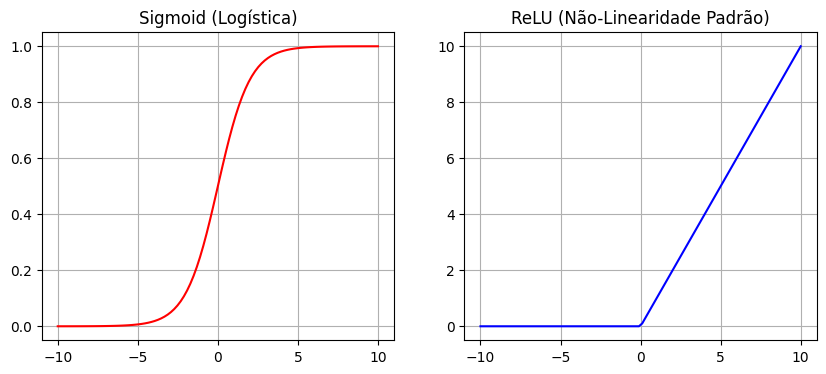

In [3]:
# Visualização das Funções de Ativação
def plot_activations():
    x = np.linspace(-10, 10, 100)
    sigmoid = 1 / (1 + np.exp(-x))
    relu = np.maximum(0, x)
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, sigmoid, 'r', label='Sigmoid')
    plt.title("Sigmoid (Logística)")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(x, relu, 'b', label='ReLU')
    plt.title("ReLU (Não-Linearidade Padrão)")
    plt.grid(True)
    plt.show()

plot_activations()

In [4]:
# Carregamento do Dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalização

# Definição da Arquitetura
model = Sequential([
    Flatten(input_shape=(28, 28)),    # Transforma matriz 28x28 em vetor 784
    Dense(128, activation='relu'),    # Camada Oculta (Hidden Layer)
    Dense(10, activation='softmax')   # Output Layer (Probabilidade por classe)
])

# Compilação e Resumo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/leonardoraiz/Library/Mobile Documents/com~apple~CloudDocs/Fatec/FATEC/Aulas/IA/Outros/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

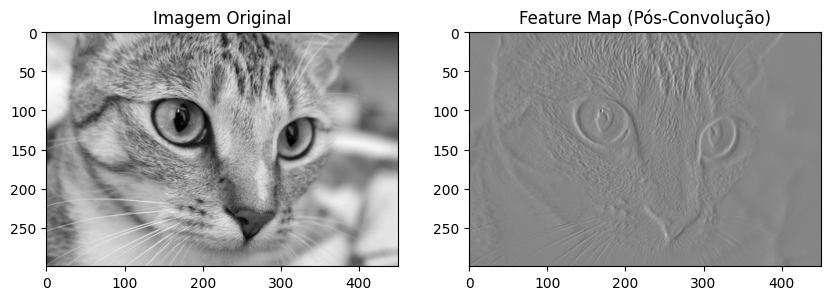

In [6]:
from skimage import data, color
image = color.rgb2gray(data.chelsea()) # Carrega imagem de exemplo

# Definição Manual de um Kernel (Detector de Bordas Verticais)
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Aplicação da Convolução
feature_map = convolve2d(image, kernel, mode='same')

# Visualização
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (Pós-Convolução)")
plt.show()

In [7]:
cnn_model = Sequential([
    # Bloco Convolucional 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    # Bloco Convolucional 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Classificador Denso (Head)
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

print("--- Arquitetura CNN ---")
cnn_model.summary()

--- Arquitetura CNN ---


/Users/leonardoraiz/Library/Mobile Documents/com~apple~CloudDocs/Fatec/FATEC/Aulas/IA/Outros/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)